In [1]:
import pandas as pd
# load the source data for each panel 
panel_a = pd.read_excel('./SD_FIG2.xlsx',engine='openpyxl',sheet_name='Panel_a',index_col=0)
panel_b = pd.read_excel('./SD_FIG2.xlsx',engine='openpyxl',sheet_name='Panel_b',index_col=0)
panel_c = pd.read_excel('./SD_FIG2.xlsx',engine='openpyxl',sheet_name='Panel_c',index_col=0)
panel_d = pd.read_excel('./SD_FIG2.xlsx',engine='openpyxl',sheet_name='Panel_d',index_col=0)
panel_e = pd.read_excel('./SD_FIG2.xlsx',engine='openpyxl',sheet_name='Panel_e',index_col=0)
panel_f = pd.read_excel('./SD_FIG2.xlsx',engine='openpyxl',sheet_name='Panel_f',index_col=0)
panel_g = pd.read_excel('./SD_FIG2.xlsx',engine='openpyxl',sheet_name='Panel_g',index_col=0)

/userdata/asilva/py3.9env/lib/python3.9/site-packages/seaborn/categorical.py:82: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]
/userdata/asilva/py3.9env/lib/python3.9/site-packages/seaborn/categorical.py:82: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]
/tmp/ipykernel_3329617/384404648.py:223: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  panel_b['Day'][panel_b['Day']>1344] -= offset


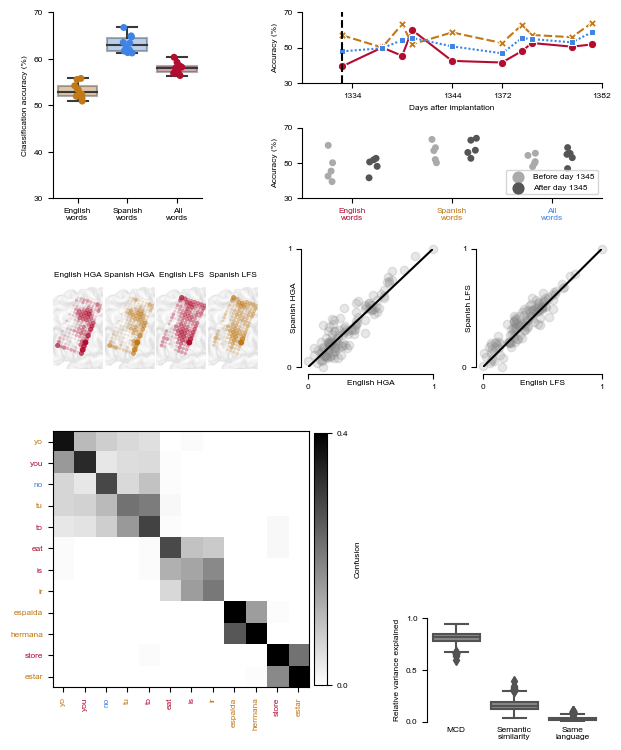

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [2]:
import pickle
import pandas as pd
import numpy as np
import pandas as pd
from gimutil.configuration import config
from gimutil.visualization import plotting_tools
import matplotlib.pyplot as plt
def plot_vals_on_brain(weights,color_map,fig,ax):
    subject     = 'bravo1'
    cbar_params = {
        'plot_colorbar'        : False,
    }

    elec_size_color_params = {
        'color_spec'   : color_map,
        'color_params' : {'min': 0,  'max': 1,   'relative': True},
        'size_params'  : {'min': 1., 'max': 20., 'relative': True, 'scale': 19.}, # 5,100,95
    }

    # Creates the plot
    all_plot_params = config.load_image_and_elec_config(subject)
    all_plot_params['elec_size_color_params'] = elec_size_color_params
    all_plot_params['elec_weights'] = weights
    all_plot_params.update(cbar_params)
    plotting_tools.plot_images_and_elecs(**all_plot_params,ax=ax,show_fig=False)
    
    
        
        
        
# Computes and plots the dendrogram
import seaborn as sns
import matplotlib.font_manager
import matplotlib as mpl
from gimutil.visualization import plotting_tools
import matplotlib.pyplot as plt
from statannot import add_stat_annotation

mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['font.sans-serif'] = ['Arial']
plt.rcParams.update({'font.size': 6})#, 'font.sans-serif': 'Arial'})
plt.rcParams['svg.fonttype'] = 'none'
# Specifies plot parameters
rows = {
    'top_start' : 0,
    'top_stop'  : 315,
    'stabtime_start': 0,
    'stabtime_stop': 120,
    'stabbox_start': 195,
    'stabbox_stop': 315,
    'bot_start': 315,
    'bot_stop' : 750,
    'scat_start': 400,
    'scat_stop' : 600,
    'confmat_start' : 650,
    'confmat_stop' : 1200,
    'coeff_start' : int((1200-650)/2) + 650 + 100,
    'coeff_stop': 1200,
    'total'      : 1200
}
start_sals = 0
width = 50
pad = 2
overall_stop = 150
overall_pad = 100#50
total_sals = start_sals+4*width+3*pad 

scatter_pad = 50#15


start_scatter = total_sals + scatter_pad
scatter_width = 125#100


overal_total = 550#450

coeff_pad  = 100#50
cols = {
    'overallacc_start' : 0,
    'overallacc_stop'  : overall_stop,
    'enghg_start': start_sals,
    'enghg_stop' : start_sals+width,
    'spahg_start': start_sals+width+pad,
    'spahg_stop' : start_sals+2*width+pad,
    'englfs_start': start_sals+2*width+2*pad,
    'englfs_stop' : start_sals+3*width+2*pad,
    'spalfs_start': start_sals+3*width+3*pad,
    'spalfs_stop' : start_sals+4*width+3*pad,
    'hgscatter_start': start_scatter,
    'hgscatter_stop': start_scatter + scatter_width,
    'lfscatter_start': start_scatter + scatter_width + scatter_pad,
    'lfscatter_stop': start_scatter + scatter_width + scatter_pad + scatter_width, 
    'stability_start' : overall_stop+overall_pad,
    'stability_stop'  : overal_total,
    'conf_start' : 0,
    'conf_stop' : int(overal_total/2),
    'coeff_start' : int(overal_total/2) + coeff_pad,
    'coeff_stop' : overal_total,
    'total'      : overal_total
}
all_panel_params = {
    'worddec' : {'row_and_col_spec' : ('top', 'overallacc')},
   'enghg' : {'row_and_col_spec' : ('bot', 'enghg')},
    'stability' : {'row_and_col_spec' : ('stabtime', 'stability')},
    'stabilitybox' : {'row_and_col_spec' : ('stabbox', 'stability')},

    'spahg' : {'row_and_col_spec' : ('bot', 'spahg')},
    'englfs' : {'row_and_col_spec' : ('bot', 'englfs')},
    'spalfs' : {'row_and_col_spec' : ('bot', 'spalfs')},
    'hgscatter'           : {'row_and_col_spec' : ('scat', 'hgscatter')},
    'lfscatter'           : {'row_and_col_spec' : ('scat', 'lfscatter')},
    'conf'           : {'row_and_col_spec' : ('confmat', 'conf')},
    'coeff'           : {'row_and_col_spec' : ('coeff', 'coeff')}
    

}



hex_col = sns.color_palette("deep", as_cmap=True)
colors = ['#b20d30','#c17817','#3f84e5','#3f784c']

color_pal = ['#b20d30','#c17817','#898989']



w_to_h = 10./13.
width = 7.08661
# Creates the plot
fig, axs = plotting_tools.setup_figure(
    all_panel_params=all_panel_params, row_specs=rows, col_specs=cols,
    figsize=(width,width/w_to_h) #15,12
)

ax = axs['englfs']
ax.set_title('English LFS',fontsize=6)
plot_vals_on_brain(panel_d['English LFS'].values,color_pal[0],fig,ax)    
ax.axes.set_xlim([200,500])
ax.axes.set_ylim([100,600])

ax = axs['spalfs']
ax.set_title('Spanish LFS',fontsize=6)
plot_vals_on_brain(panel_d['Spanish LFS'].values,color_pal[1],fig,ax)    
ax.axes.set_xlim([200,500])
ax.axes.set_ylim([100,600])


ax = axs['enghg']
plot_vals_on_brain(panel_d['English HGA'].values,color_pal[0],fig,ax)    
ax.axes.set_xlim([200,500])
ax.axes.set_ylim([100,600])
ax.set_title('English HGA',fontsize=6)


ax = axs['spahg']
plot_vals_on_brain(panel_d['Spanish HGA'].values,color_pal[1],fig,ax)    
ax.axes.set_xlim([200,500])
ax.axes.set_ylim([100,600])
ax.set_title('Spanish HGA',fontsize=6)

from sklearn.preprocessing import MinMaxScaler

ax = axs['hgscatter']

ax.scatter(panel_e['Spanish HGA'],panel_e['English HGA'],color='#898989',alpha=0.2,clip_on=False)
ax.plot([np.min(panel_e['Spanish HGA']),np.max(panel_e['Spanish HGA'])],[np.min(panel_e['Spanish HGA']),np.max(panel_e['Spanish HGA'])],color='k')

ax.set_ylabel('Spanish HGA',labelpad=-7)
ax.set_xlabel('English HGA',labelpad=-7)
ax.set_xticks([0,1])
ax.set_yticks([0,1])
ax.set_ylim([0,1])
ax.set_xlim([0,1])
sns.despine(ax=ax, offset=dict(left=5, bottom=5))

ax = axs['lfscatter']


ax.scatter(panel_e['Spanish LFS'],panel_e['English LFS'],color='#898989',alpha=0.2,clip_on=False)
ax.plot([np.min(panel_e['Spanish LFS']),np.max(panel_e['Spanish LFS'])],[np.min(panel_e['Spanish LFS']),np.max(panel_e['Spanish LFS'])],color='k')

ax.set_ylabel('Spanish LFS',labelpad=-7)
ax.set_xlabel('English LFS',labelpad=-7)
ax.set_xticks([0,1])
ax.set_yticks([0,1])
ax.set_ylim([0,1])
ax.set_xlim([0,1])
sns.despine(ax=ax, offset=dict(left=5, bottom=5))







ax = axs['worddec']
from collections import deque
color_r = deque(colors[:3])
color_r.rotate(-1)


sns.boxplot(data=panel_a,palette=color_r,order=['eng_masked','spa_masked','both_masked'],ax=ax, boxprops={'alpha': 0.4})

sns.stripplot(data=panel_a,order=['eng_masked','spa_masked','both_masked'],palette=color_r,ax=ax)


ax.set_ylim([30,70])
ax.set_xticklabels(['English\nwords','Spanish\nwords','All\nwords'])
ax.set_ylabel('Classification accuracy (%)')
ax.set_yticks([30,40,50,60,70])



ax = axs['stability']
# First day of frozen collection 
first_day = 1333
# make the axes aesthetically nice but offset for the break
offset = 23

panel_b_og = panel_b.copy() #stability_df.copy()

panel_b['Day'][panel_b['Day']>1344] -= offset



sns.lineplot(
    data=panel_b,
    x="Day", y='Accuracy', hue = 'Language', style= 'Language',
    markers=True, dashes=True,ax=ax,palette=colors[:-1]
)
ax.get_legend().remove()
ax.set_ylabel('Accuracy (%)')
ax.set_xlabel('Days after implantation')
ax.axvline(first_day,color='k',linestyle='--')
ax.set_xlim([first_day-4,np.max(panel_b.Day)+1])
ax.set_xticks([first_day+1,first_day+11,first_day+16,first_day+26])

#ax.set_xticks([1240,1250,1255,1265])
ax.set_xticklabels([first_day+1,first_day+11,first_day+offset+16,first_day+offset+26])
ax.set_ylim([30,70])
ax.set_yticks([30,50,70])





ax = axs['conf']

ax_cols = [np.array([0.75390625, 0.46875   , 0.08984375]),
 np.array([0.6953125 , 0.05078125, 0.1875    ]),
 np.array([0.24609375, 0.515625  , 0.89453125]),
 np.array([0.75390625, 0.46875   , 0.08984375]),
 np.array([0.6953125 , 0.05078125, 0.1875    ]),
 np.array([0.6953125 , 0.05078125, 0.1875    ]),
 np.array([0.6953125 , 0.05078125, 0.1875    ]),
 np.array([0.75390625, 0.46875   , 0.08984375]),
 np.array([0.75390625, 0.46875   , 0.08984375]),
 np.array([0.75390625, 0.46875   , 0.08984375]),
 np.array([0.6953125 , 0.05078125, 0.1875    ]),
 np.array([0.75390625, 0.46875   , 0.08984375])]

mat = ax.imshow(panel_f.values,cmap='binary',vmin=0,vmax=.4)
ax.set_xticks(range(0,len(panel_f)))
ax.set_xticklabels(panel_f.columns,rotation=90)
ax.set_yticks(range(0,len(panel_f)))
ax.set_yticklabels(panel_f.columns,rotation=0)

for i,cur_label in enumerate(ax.get_yticklabels()):
    cur_label.set_color(ax_cols[i])

for i,cur_label in enumerate(ax.get_xticklabels()):
    cur_label.set_color(ax_cols[i])    

ax.spines['top'].set_visible(True)
ax.spines['right'].set_visible(True)

cbar = fig.colorbar(mat, ax=ax,fraction=0.046, pad=0.02,ticks=[0,0.4])
cbar.set_label('Confusion')

ax = axs['coeff']


import matplotlib as mpl

sns.boxplot(data=panel_g,x='Var',y='Variance explained',ax=ax,color='#898989')
ax.set_ylim([0,1])
ax.set_ylabel('Relative variance explained')
ax.set_yticks([0,0.5,1])
ax.spines['bottom'].set_visible(False)
ax.xaxis.set_tick_params(length=0)
ax.set_xlabel('')


ax = axs['stabilitybox']
def hex_to_rgb(hex_code):
    return(tuple(int(hex_code.lstrip('#')[i:i+2], 16) for i in (0, 2, 4)))


cols = [colors[0],colors[0],colors[1],colors[1],colors[2],colors[2]]
cols = [colors[0],colors[1],colors[2]]
cols = [hex_to_rgb(col) for col in cols]
cols = [(col[0]/255., col[1]/255., col[2]/255. ) for col in cols]


sns.stripplot(ax=ax,data=panel_c,x='Language',y='Accuracy',hue='before_1250',
            order=['English','Spanish','Overall'],hue_order=['Before day 1345','After day 1345'],
            palette='binary',dodge=True)

ax.legend().set_title('')
ax.set_ylim([30,70])
ax.set_yticks([30,50,70])
ax.set_xticklabels(['English\nwords','Spanish\nwords','All\nwords'])
ax.set_ylabel('Accuracy (%)')
ax.set_xlabel('')
[t.set_color(cols[i]) for i,t in enumerate(ax.xaxis.get_ticklabels())]




fig.savefig('./fig2.svg',bbox_inches='tight')
plt.show()
